Tutorial TESS




In [1]:
#Modules
import lightkurve as lk 
%matplotlib inline
from lightkurve.correctors import RegressionCorrector, DesignMatrix
from lightkurve.correctors import PLDCorrector
import warnings
import os
import datetime
import tesslc as lc

In [2]:
PATH= datetime.datetime.now().strftime('TESS_%Y%m%dT%H%M%S')
os.makedirs(PATH)

In [3]:
Search_data= lk.search_lightcurve("TOI-3486.01", author= ['SPOC', 'TESS-SPOC']) #Modify as wanted
Search_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 66,2023,SPOC,120,221861843,0.0
1,TESS Sector 66,2023,TESS-SPOC,200,221861843,0.0


In [4]:
#Data from the planet
#Please Change as wanted

T0=2459382.5174 #Transit Midpoint
T0= T0 - 2457000
P= 2.2177820 #Period
binned= 0.005
transits= []

Example!!

In [5]:
#Download the data you want

sector_data= Search_data[0].download()
sector_name= 'sector_selected'

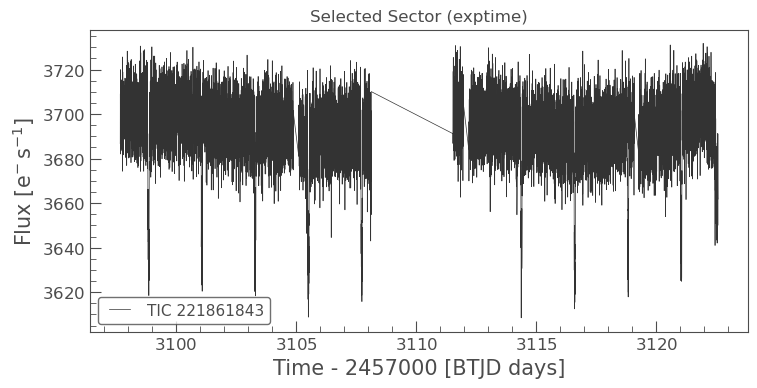

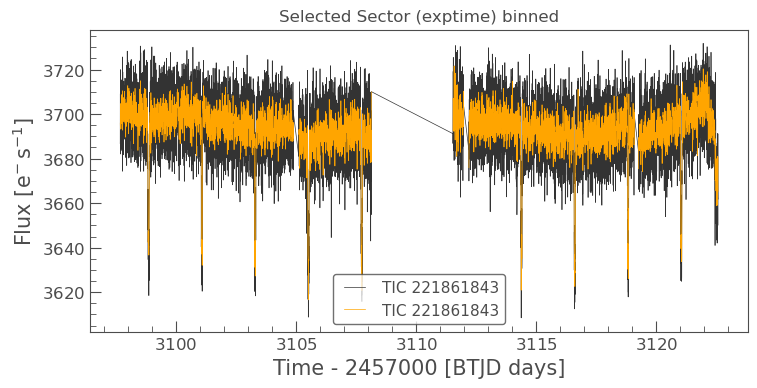

In [6]:
#Removing outliers from your data and Binned
#Play with this if you want ^^
lc.rem_outliers(sector_data, PATH, binned,'Selected Sector (exptime)') #Change the name as your desire!!

In [7]:
#Identify when the transits will happen (Assuming there is no TTV)

lc.transit_identif(sector_data, T0, P, transits)
print(transits)

Range of time: 3097.6788014938506 - 3124.222996503549

Transit midpoint T0: 2382.5173999997787

T0 adjustes to range: 3096.643203999779

Transit times:  [3098.860985999779, 3101.078767999779, 3103.296549999779, 3105.514331999779, 3107.732113999779, 3109.949895999779, 3112.167677999779, 3114.385459999779, 3116.603241999779, 3118.821023999779, 3121.038805999779, 3123.256587999779]
[3098.860985999779, 3101.078767999779, 3103.296549999779, 3105.514331999779, 3107.732113999779, 3109.949895999779, 3112.167677999779, 3114.385459999779, 3116.603241999779, 3118.821023999779, 3121.038805999779, 3123.256587999779]


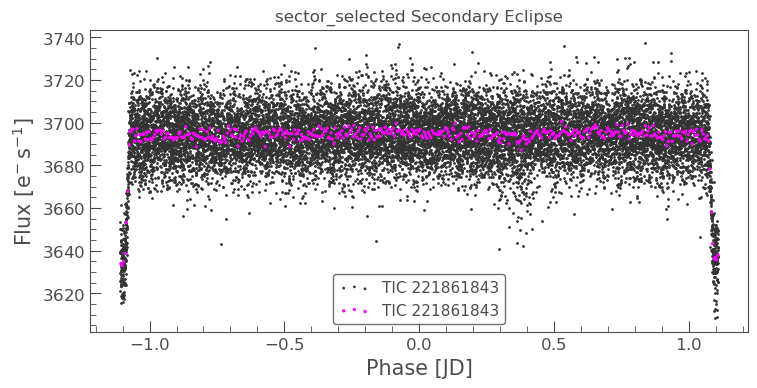

In [8]:
#Folding in order to search for secondary eclipses
lc.fold_second_tr(sector_data, T0, P, PATH, binned, sector_name)

Obtaining Phase folding...


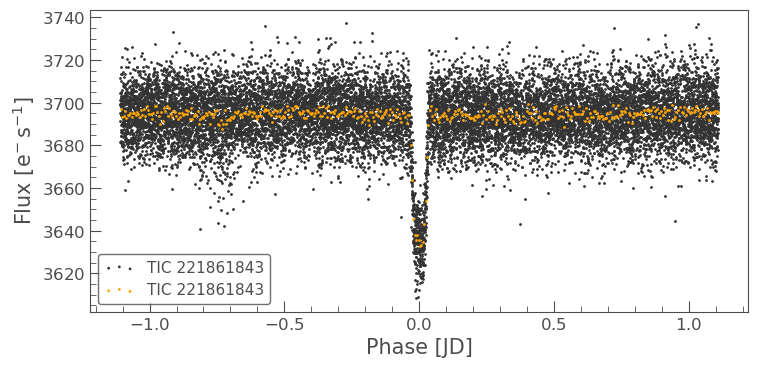

Saving data...



Data_sector_selected_PF.csv SAVED in  TESS_20240928T102928  folder.
Data_sector_selected_NoPF.csv SAVED in  TESS_20240928T102928  folder.


In [9]:
#Save the data:
#Phase folding data as 
#"Raw" data
#Also, shows phase folding plot binned
#Be careful!! This process take some time


lc.save_data(sector_data, T0, P, PATH, binned, sector_name)

Now you have the phase folding and the raw data of TESS

Now it's time to work with it.

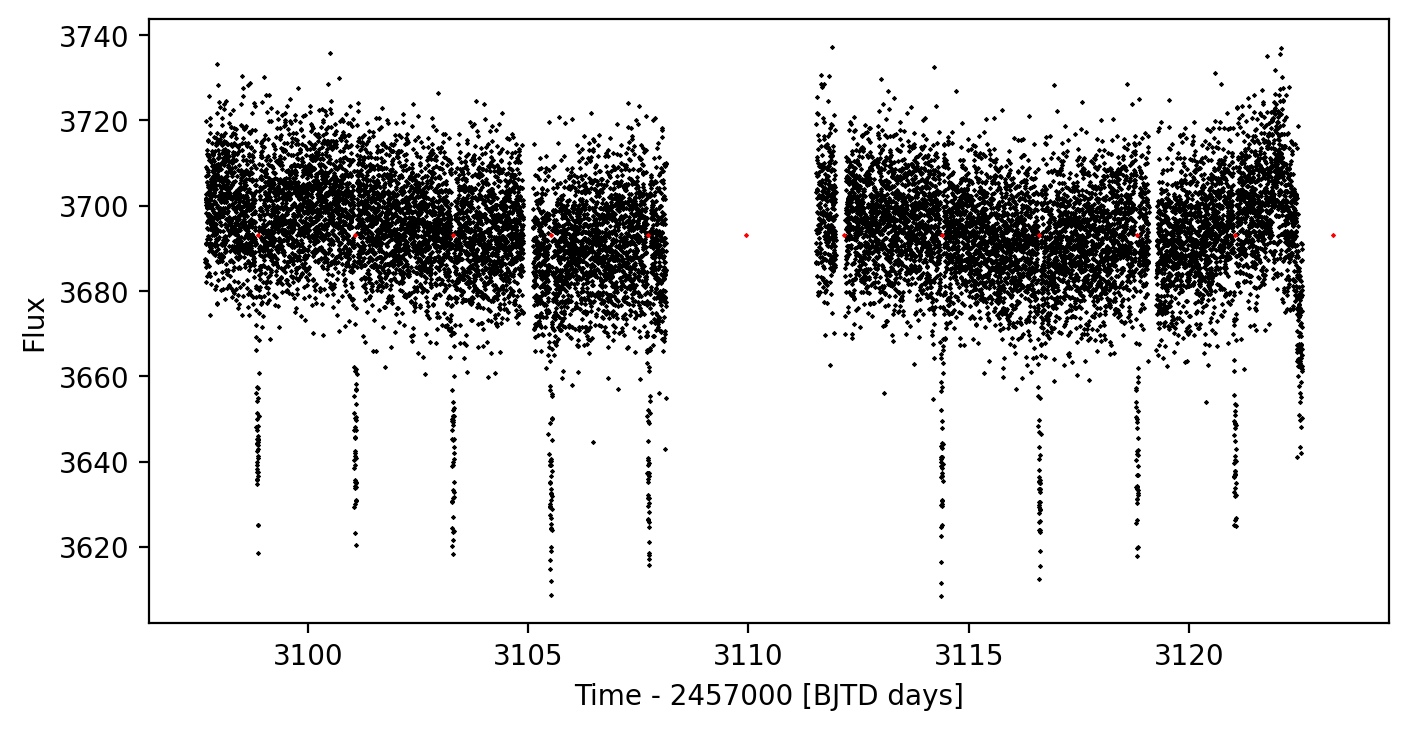

In [10]:
#Working with Raw data

#PATH= 'TESS_20240928T095644'   #PATH NAME 
sector_name= 'sector_selected'
name= 'Data_' + sector_name + '_NoPF.csv' #You can also try the _PF.csv file, just not in this object, is working weird
transits= [3098.860985999779, 3101.078767999779, 3103.296549999779, 3105.514331999779, 3107.732113999779, 3109.949895999779, 3112.167677999779, 3114.385459999779, 3116.603241999779, 3118.821023999779, 3121.038805999779, 3123.256587999779]
T0=2459382.5174 #Transit Midpoint
T0= T0 - 2457000
P= 2.2177820 #Period
binned= 0.005
lc.loading_data(PATH, binned, name, transits)

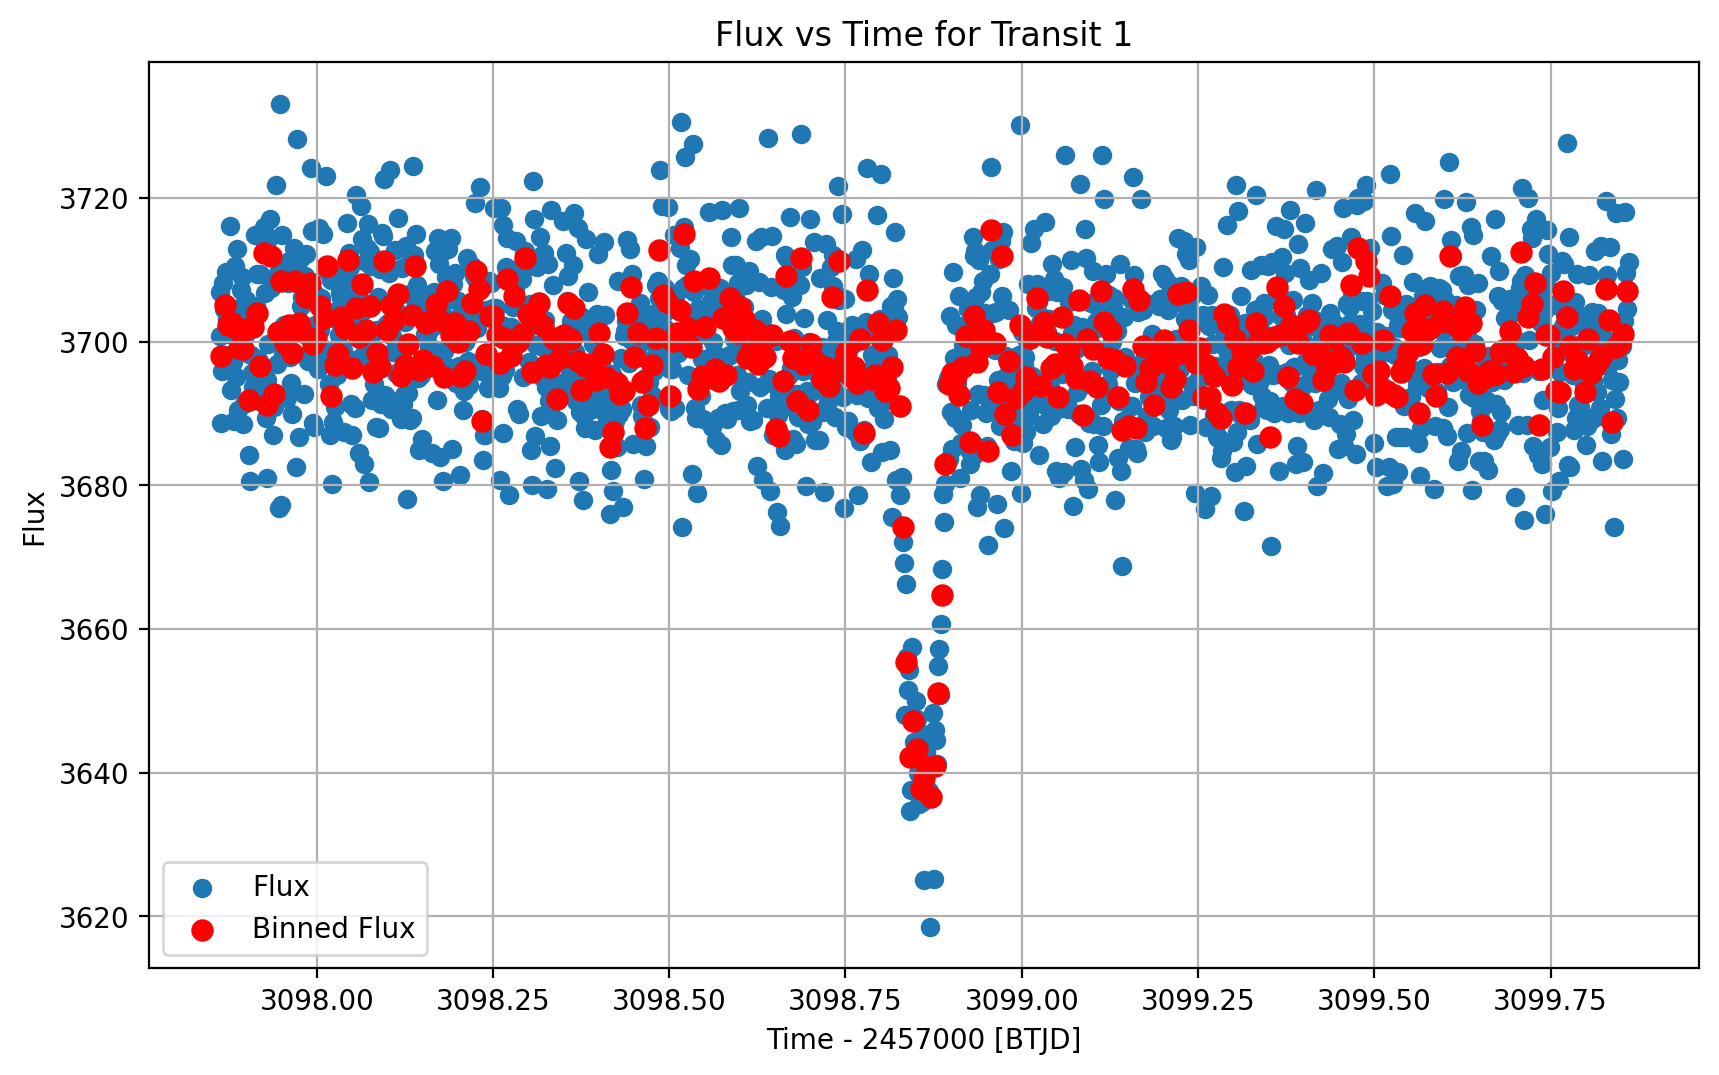

Do you wanna save this transit? (y/n): y
Transit 1 saved as Transit_Data_sector_selected_NoPF.csv_transit_1.csv.


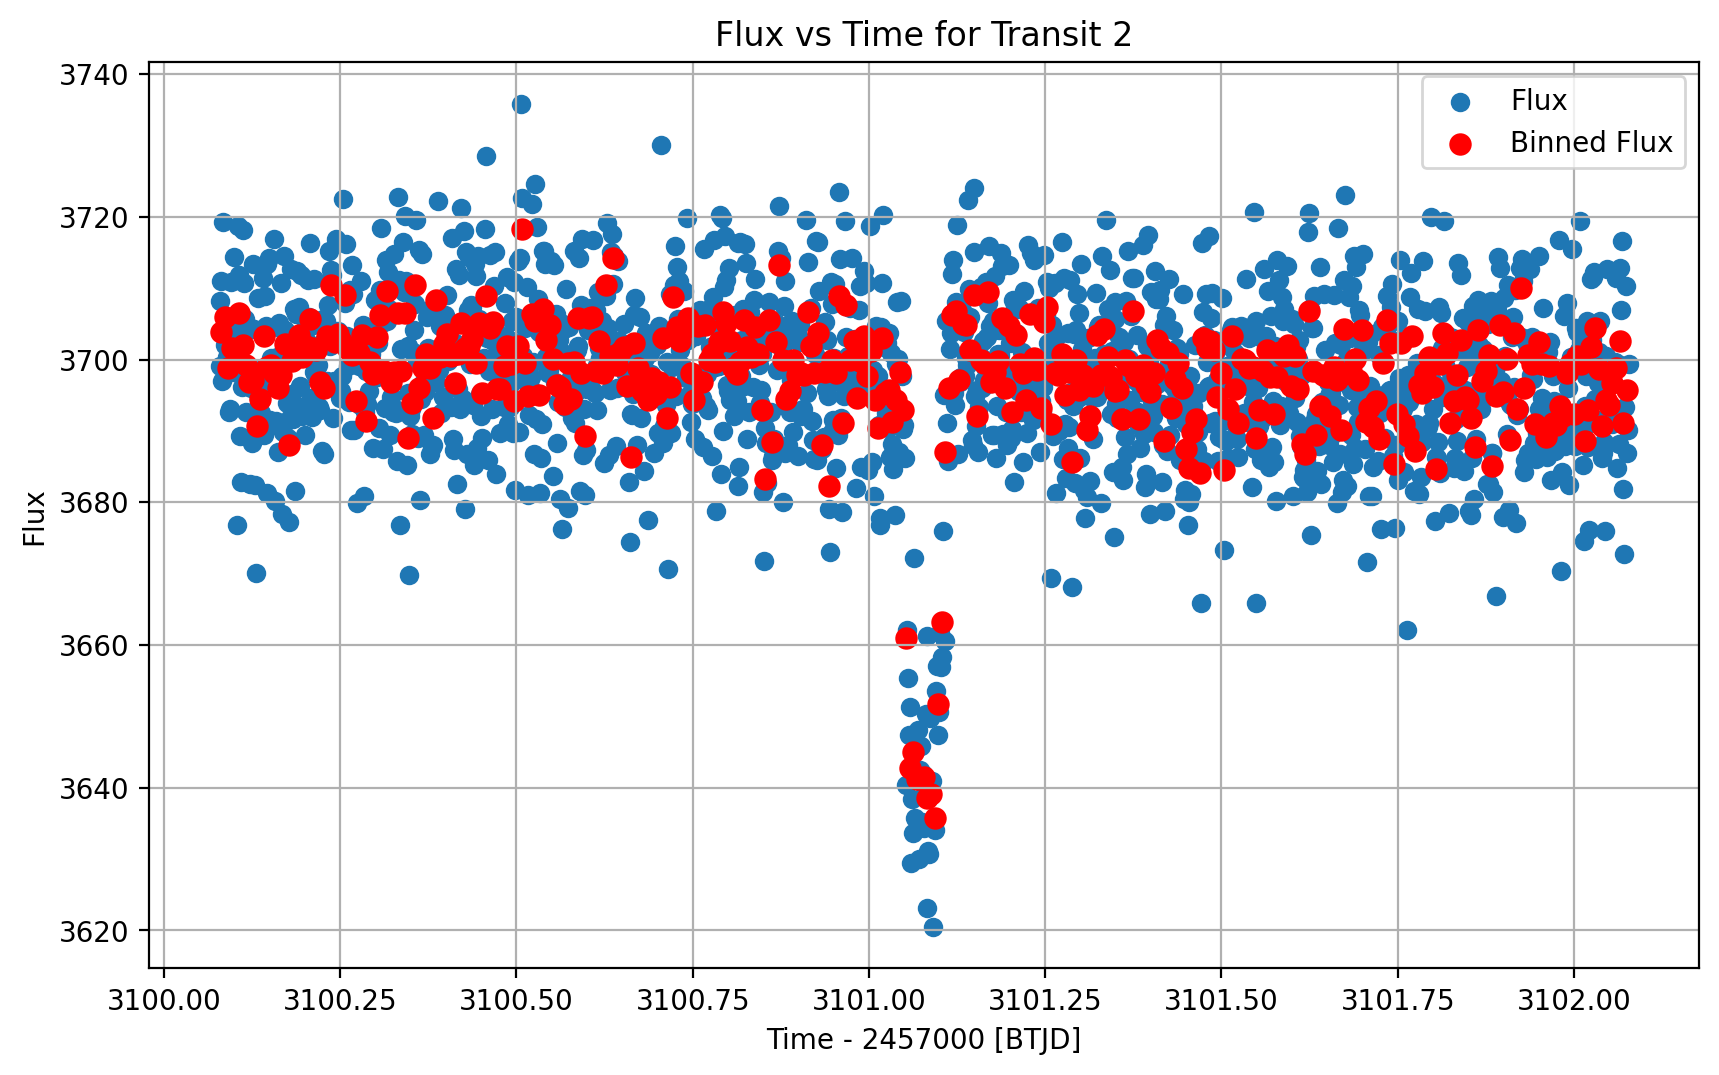

Do you wanna save this transit? (y/n): y
Transit 2 saved as Transit_Data_sector_selected_NoPF.csv_transit_2.csv.


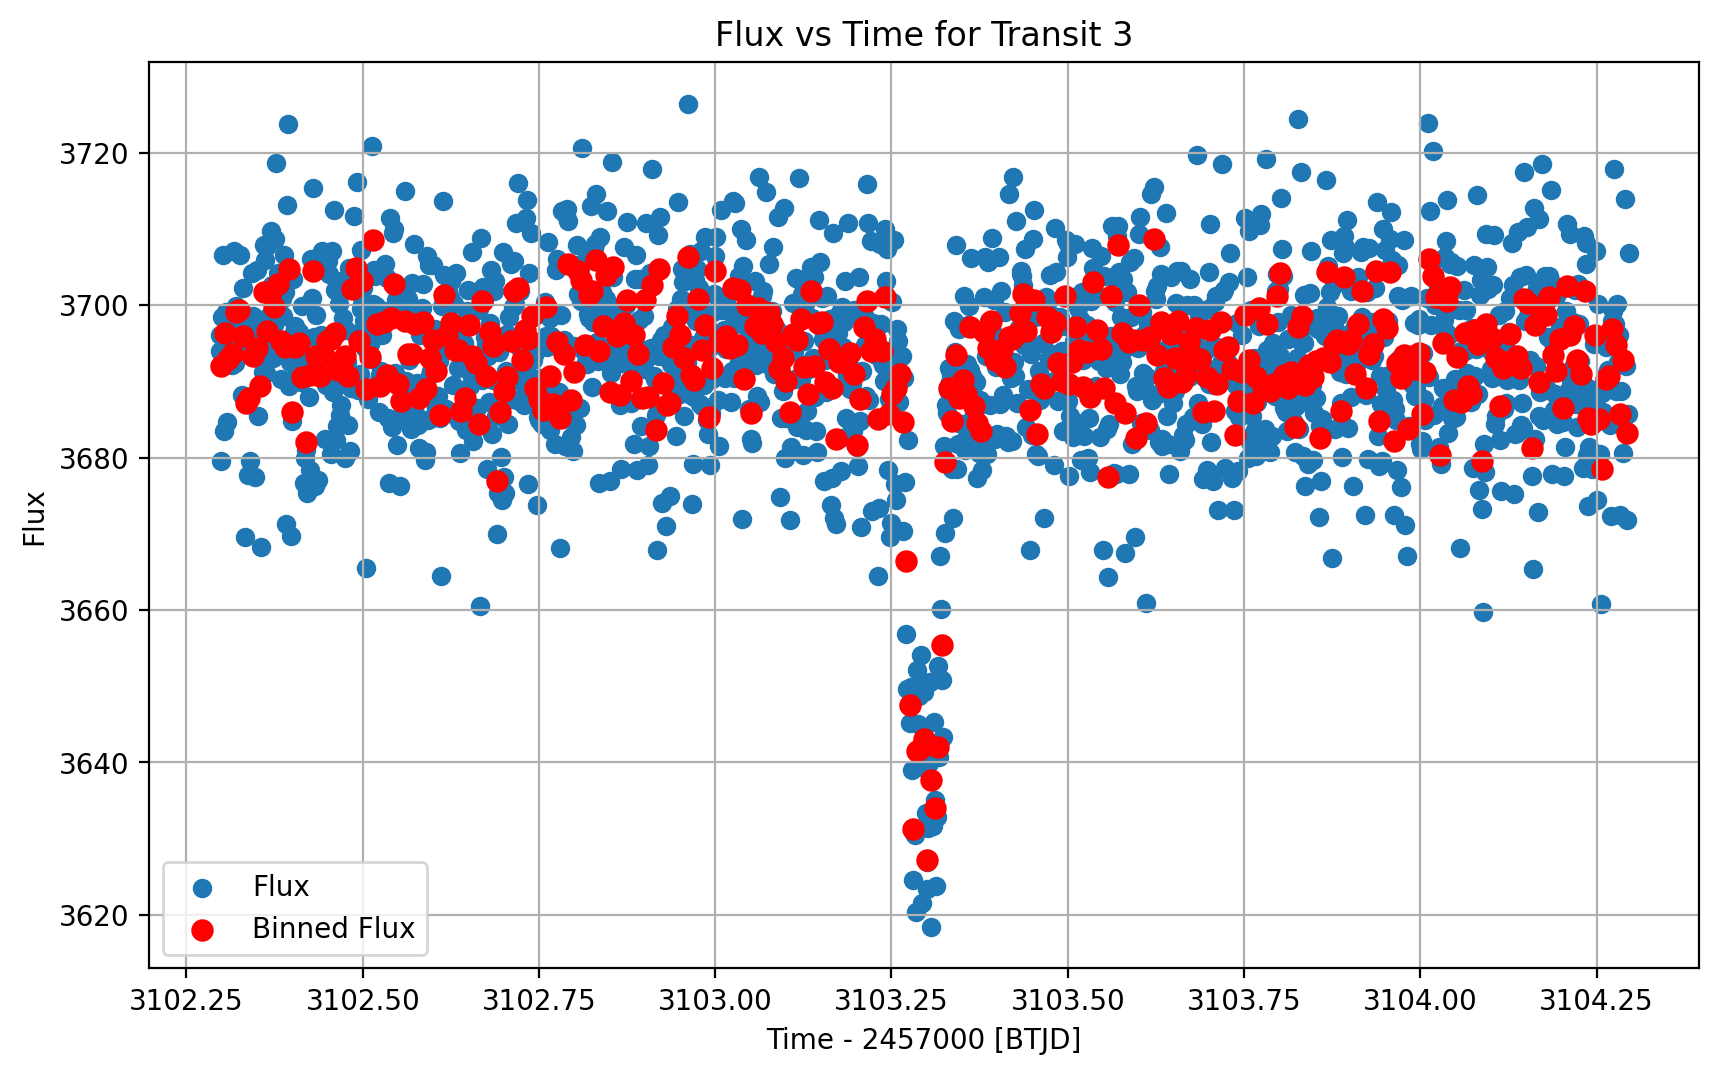

Do you wanna save this transit? (y/n): y
Transit 3 saved as Transit_Data_sector_selected_NoPF.csv_transit_3.csv.


/home/mashe/Desktop/MOTEred/TESS/TESS_Auto/tesslc.py:165: RuntimeWarning: Mean of empty slice.
  bin_means_time= [time_data[bin_indices == i].mean() for i in range(1, num_bins + 1)]
/home/mashe/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mashe/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


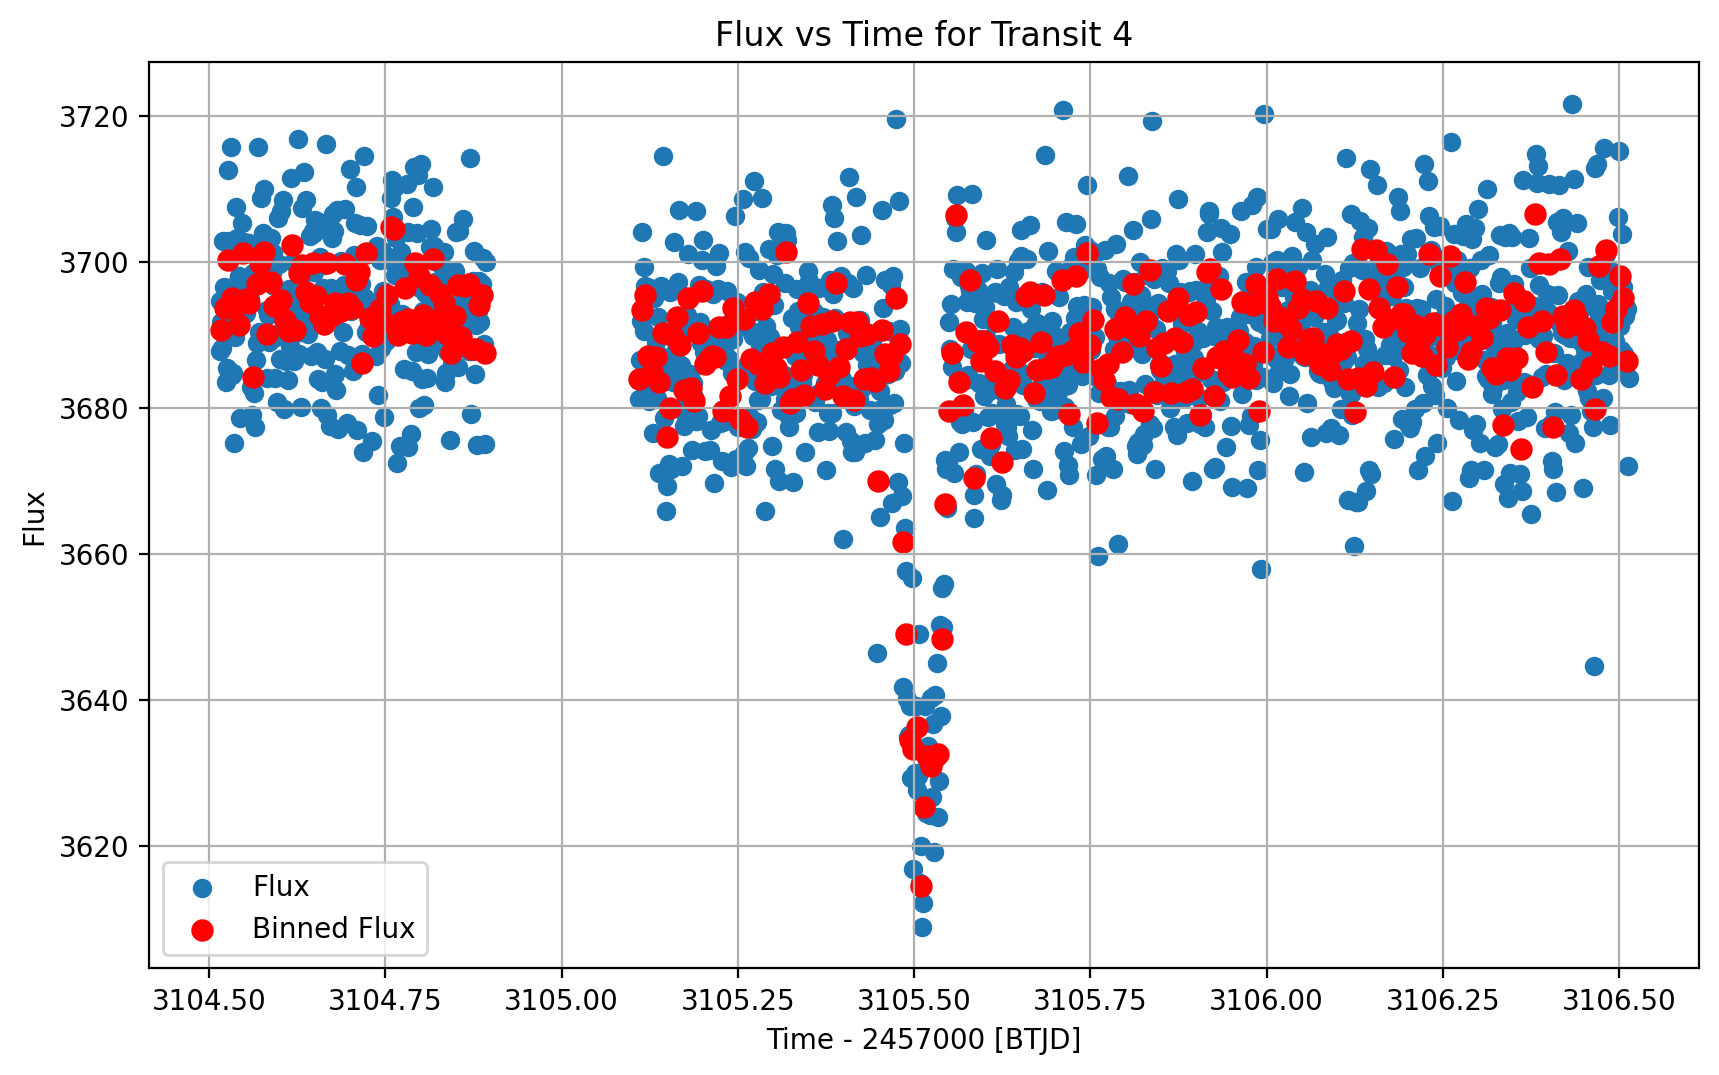

Do you wanna save this transit? (y/n): y
Transit 4 saved as Transit_Data_sector_selected_NoPF.csv_transit_4.csv.


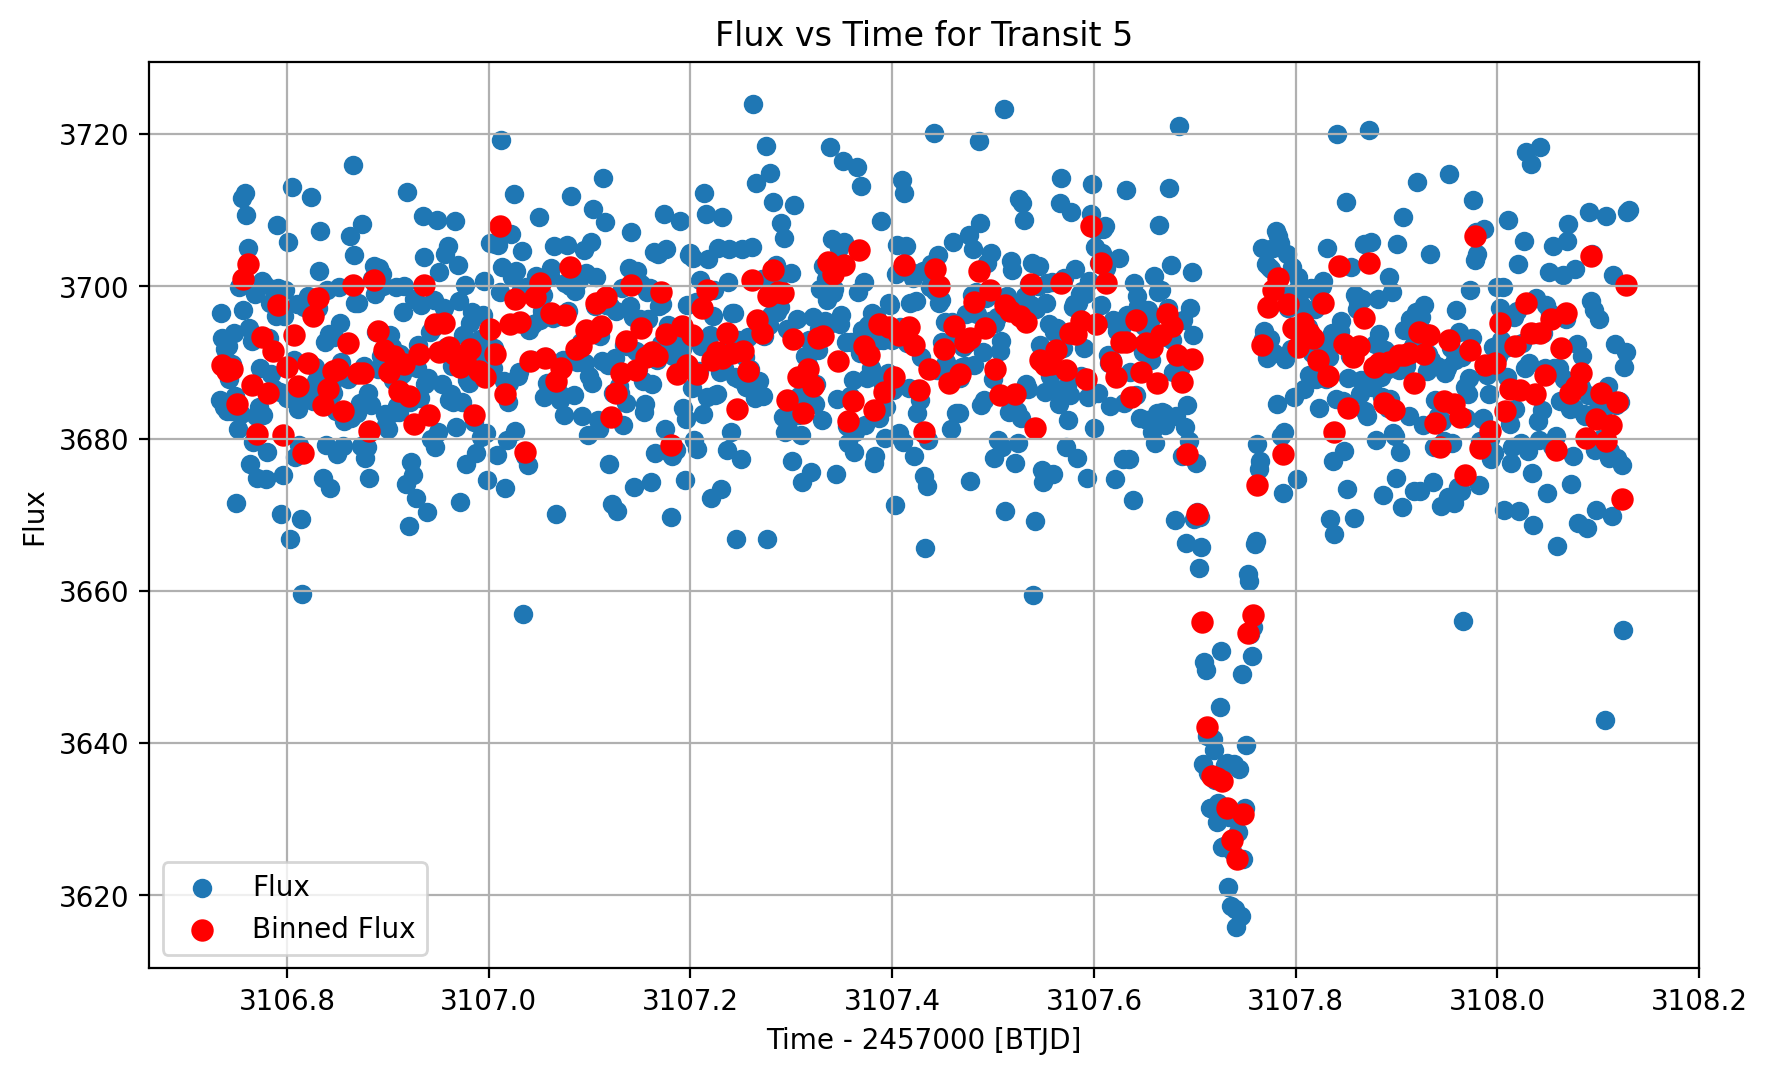

Do you wanna save this transit? (y/n): y
Transit 5 saved as Transit_Data_sector_selected_NoPF.csv_transit_5.csv.


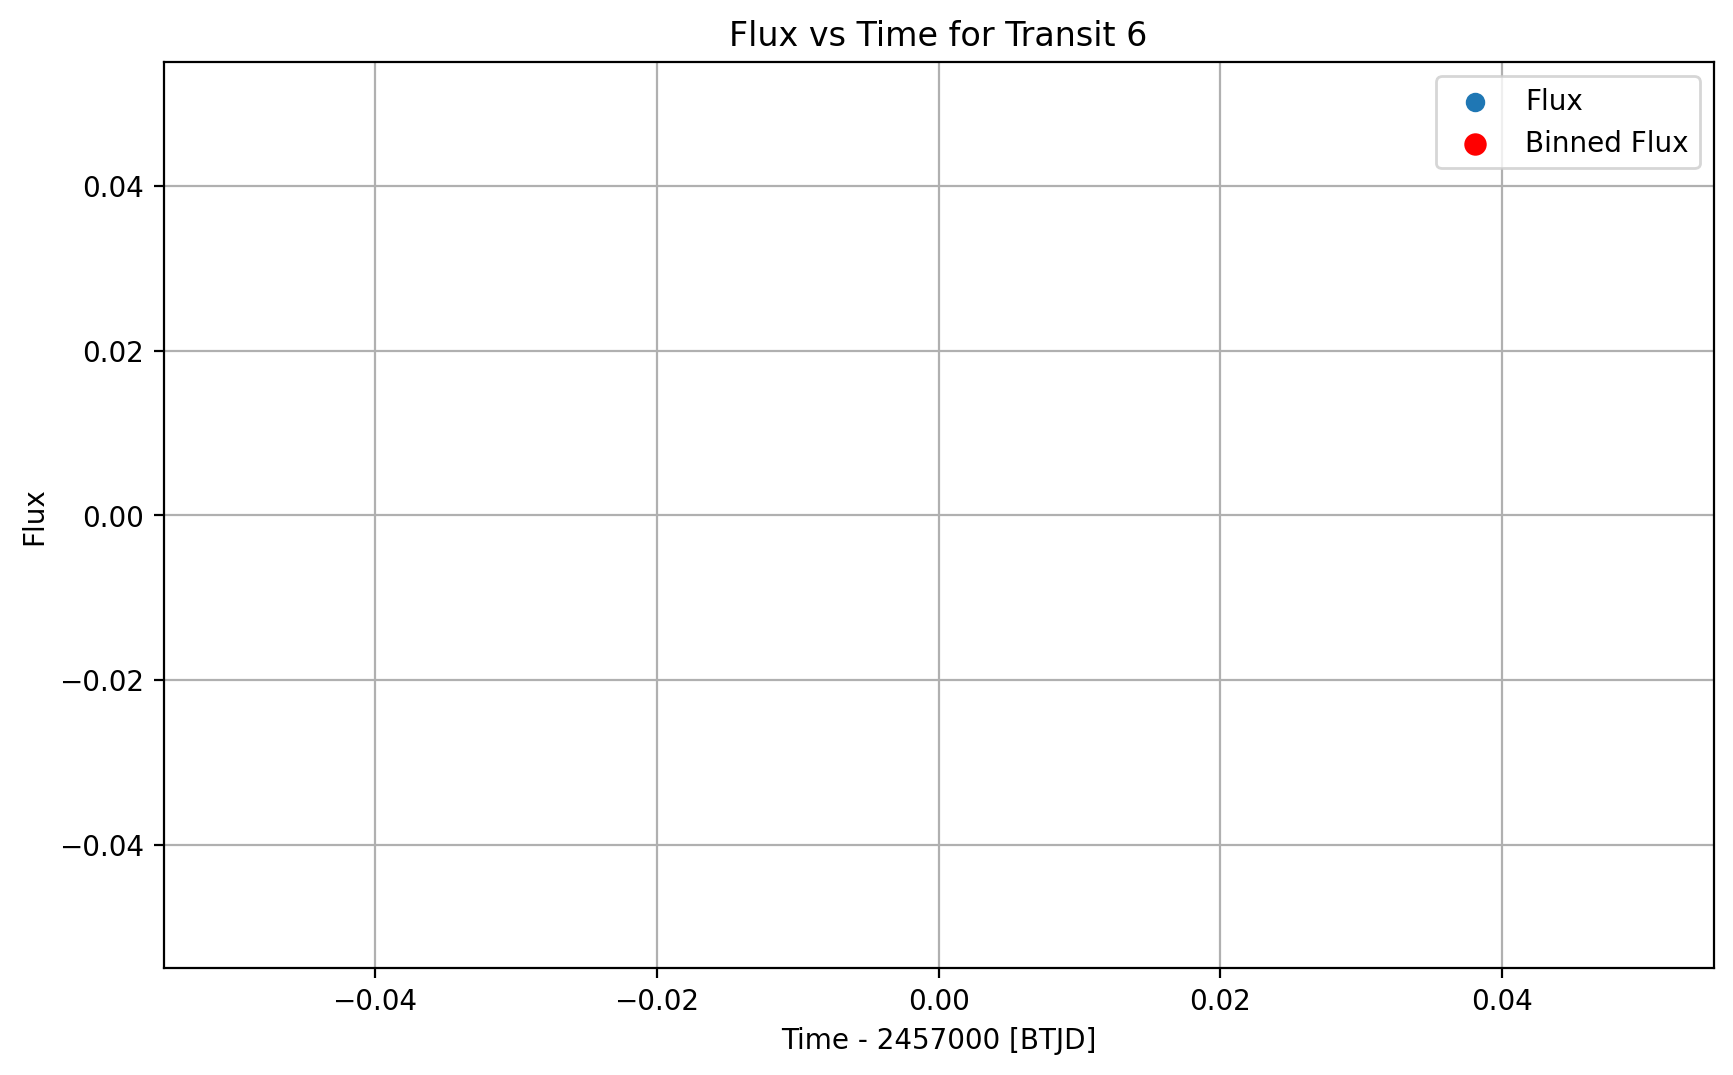

Do you wanna save this transit? (y/n): n
Plot skipped.


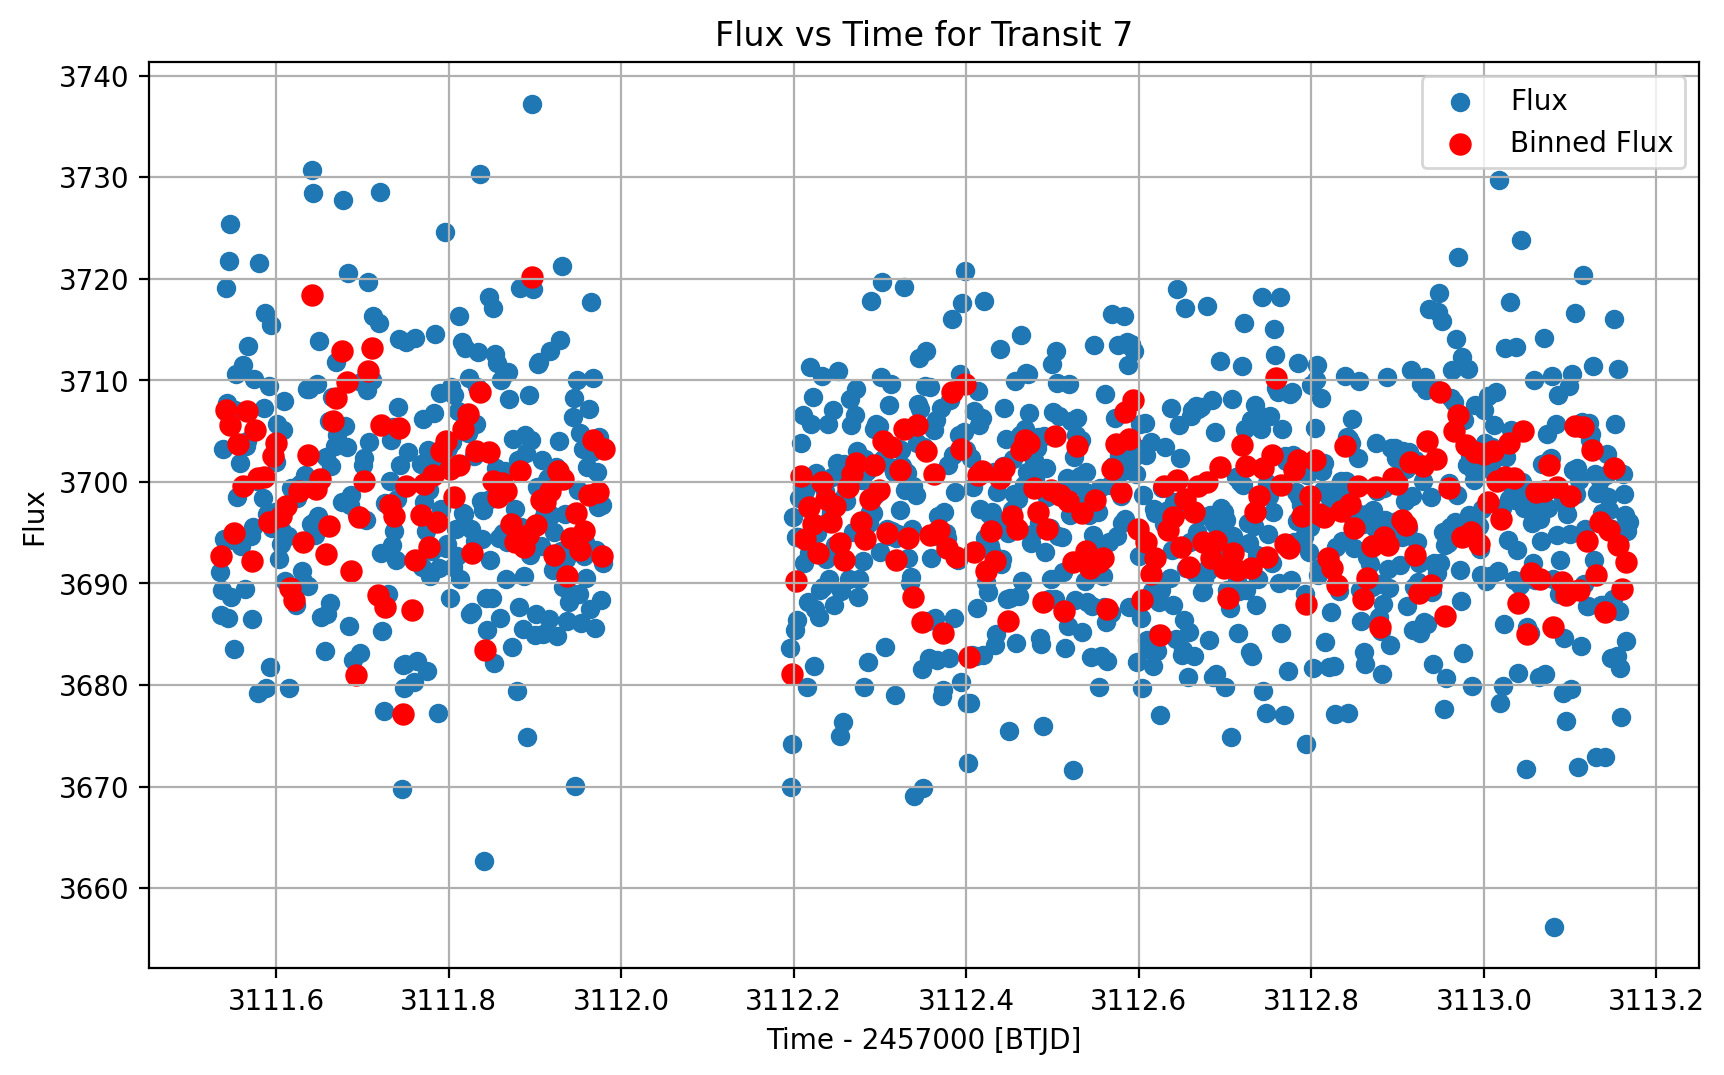

Do you wanna save this transit? (y/n): n
Plot skipped.


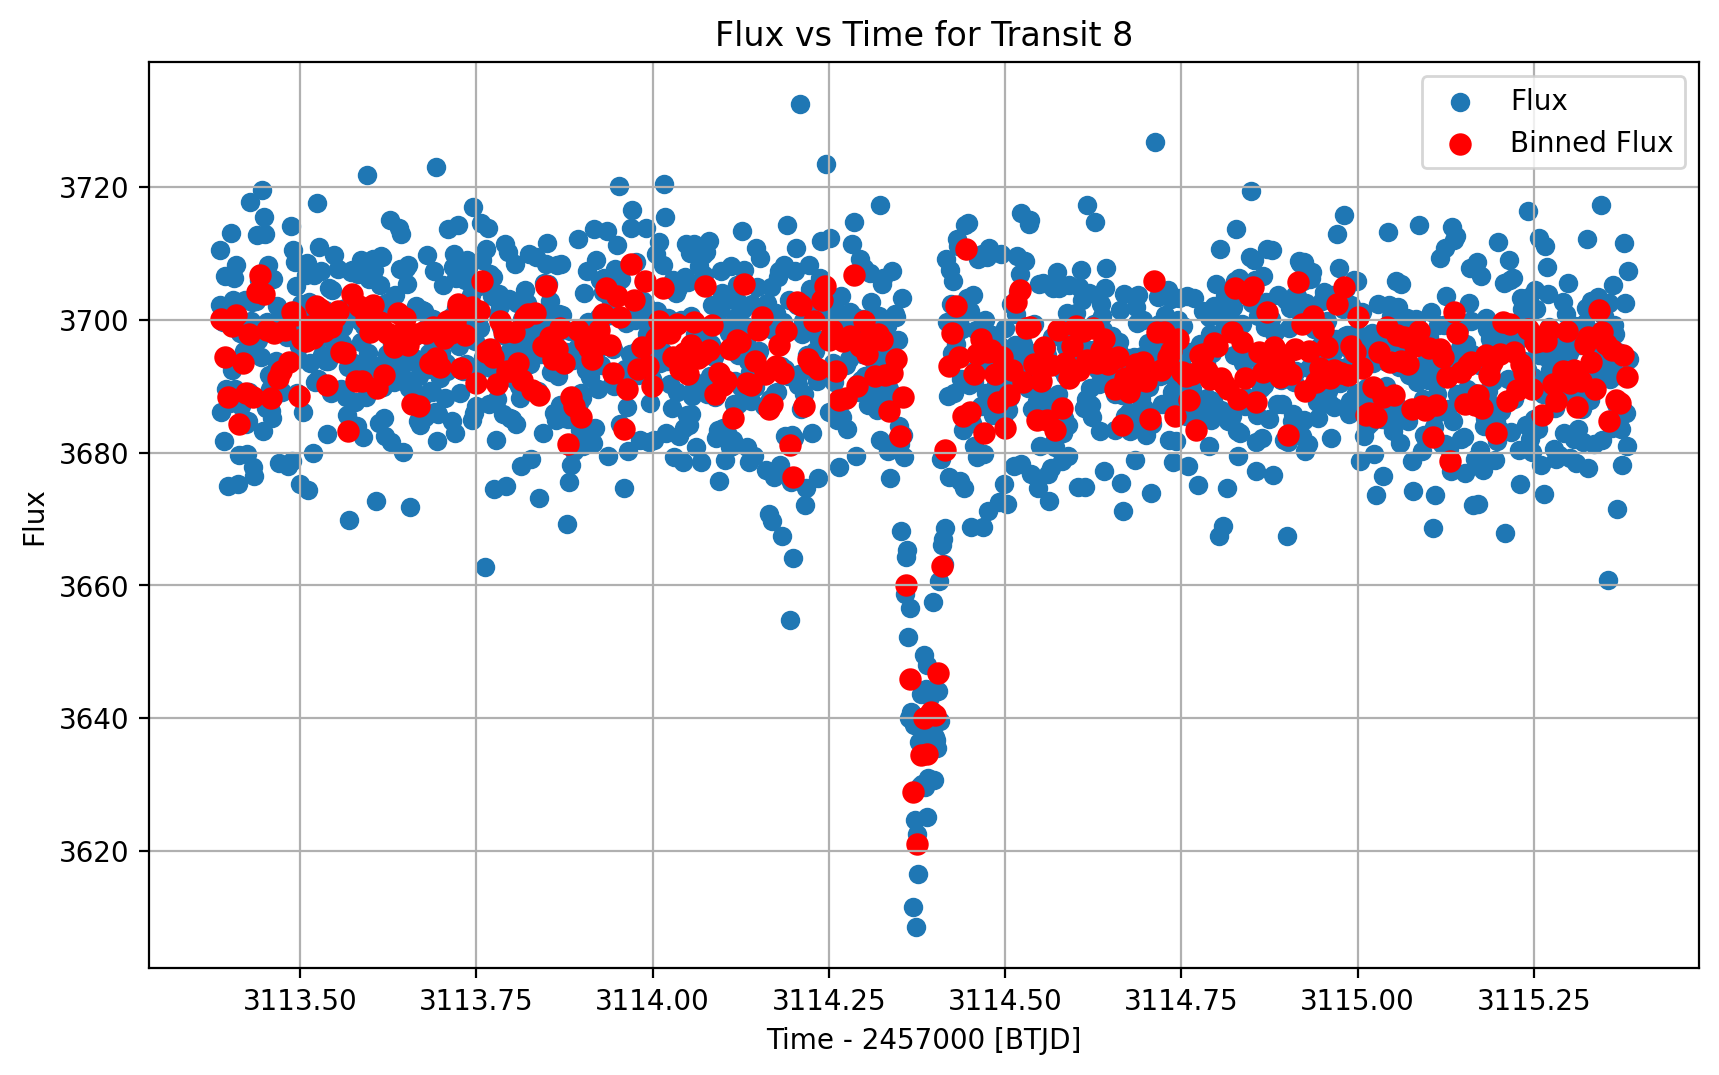

Do you wanna save this transit? (y/n): y
Transit 8 saved as Transit_Data_sector_selected_NoPF.csv_transit_8.csv.


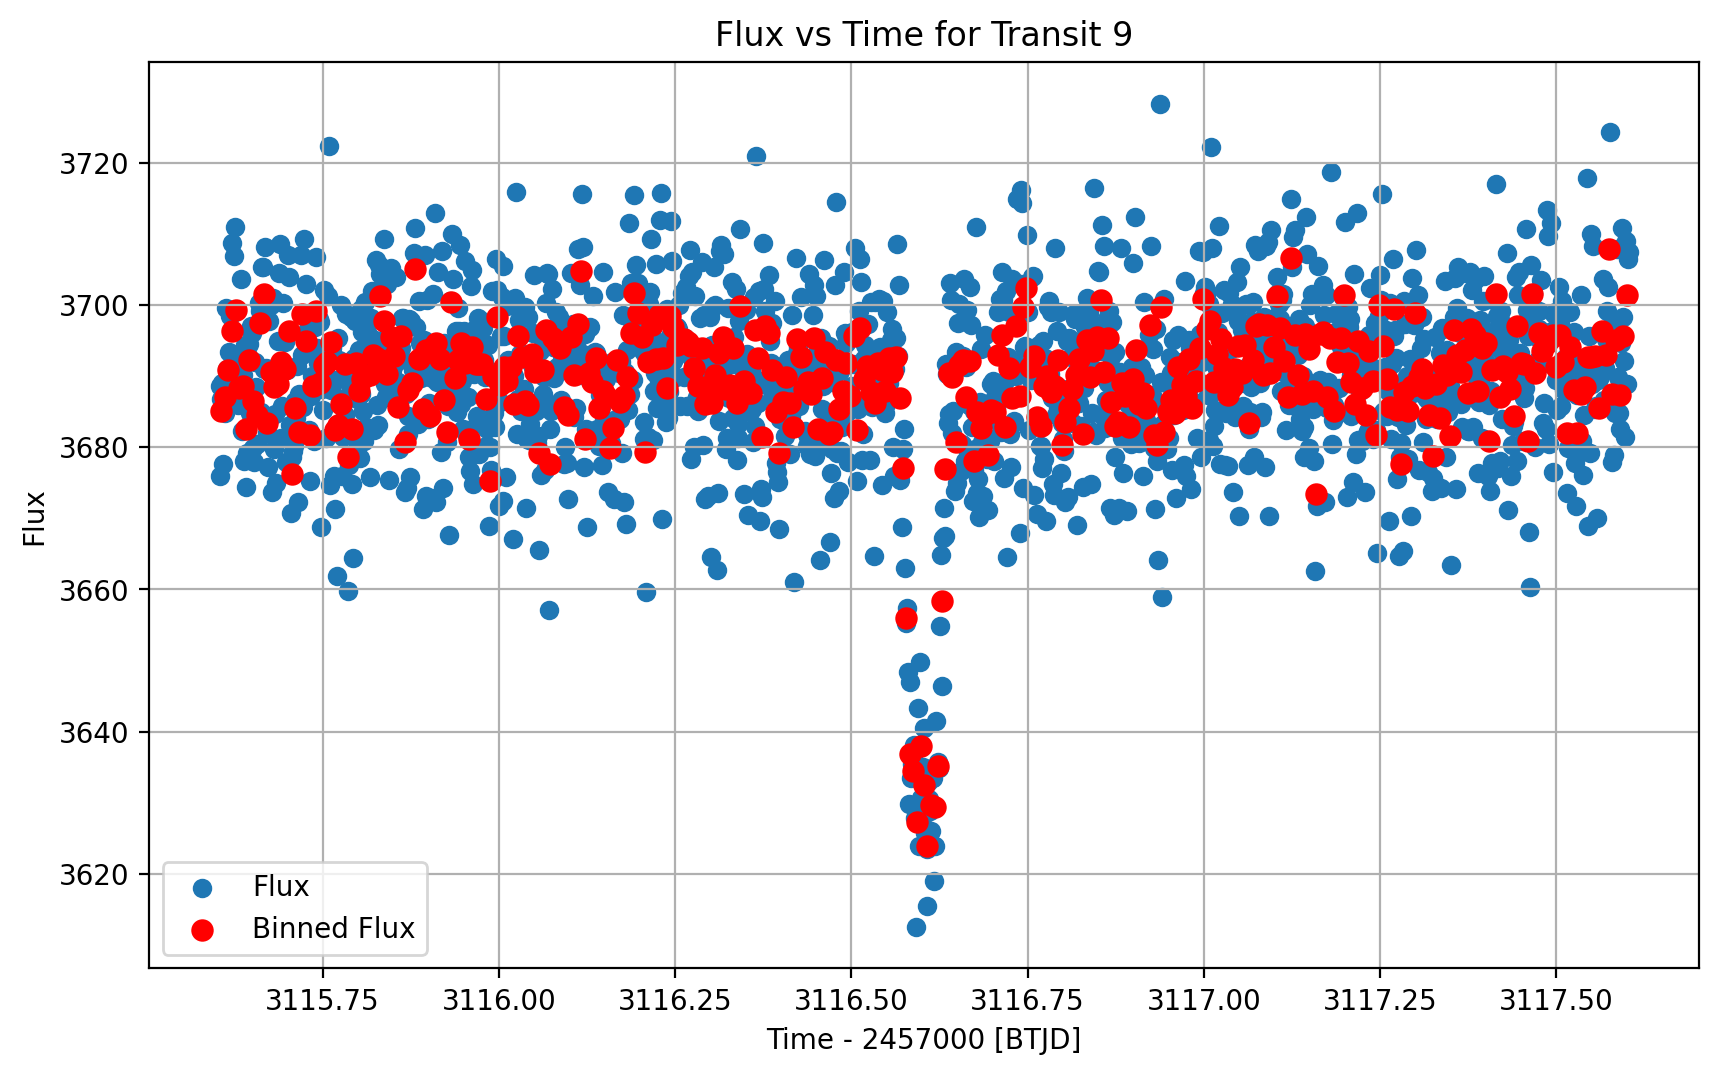

Do you wanna save this transit? (y/n): y
Transit 9 saved as Transit_Data_sector_selected_NoPF.csv_transit_9.csv.


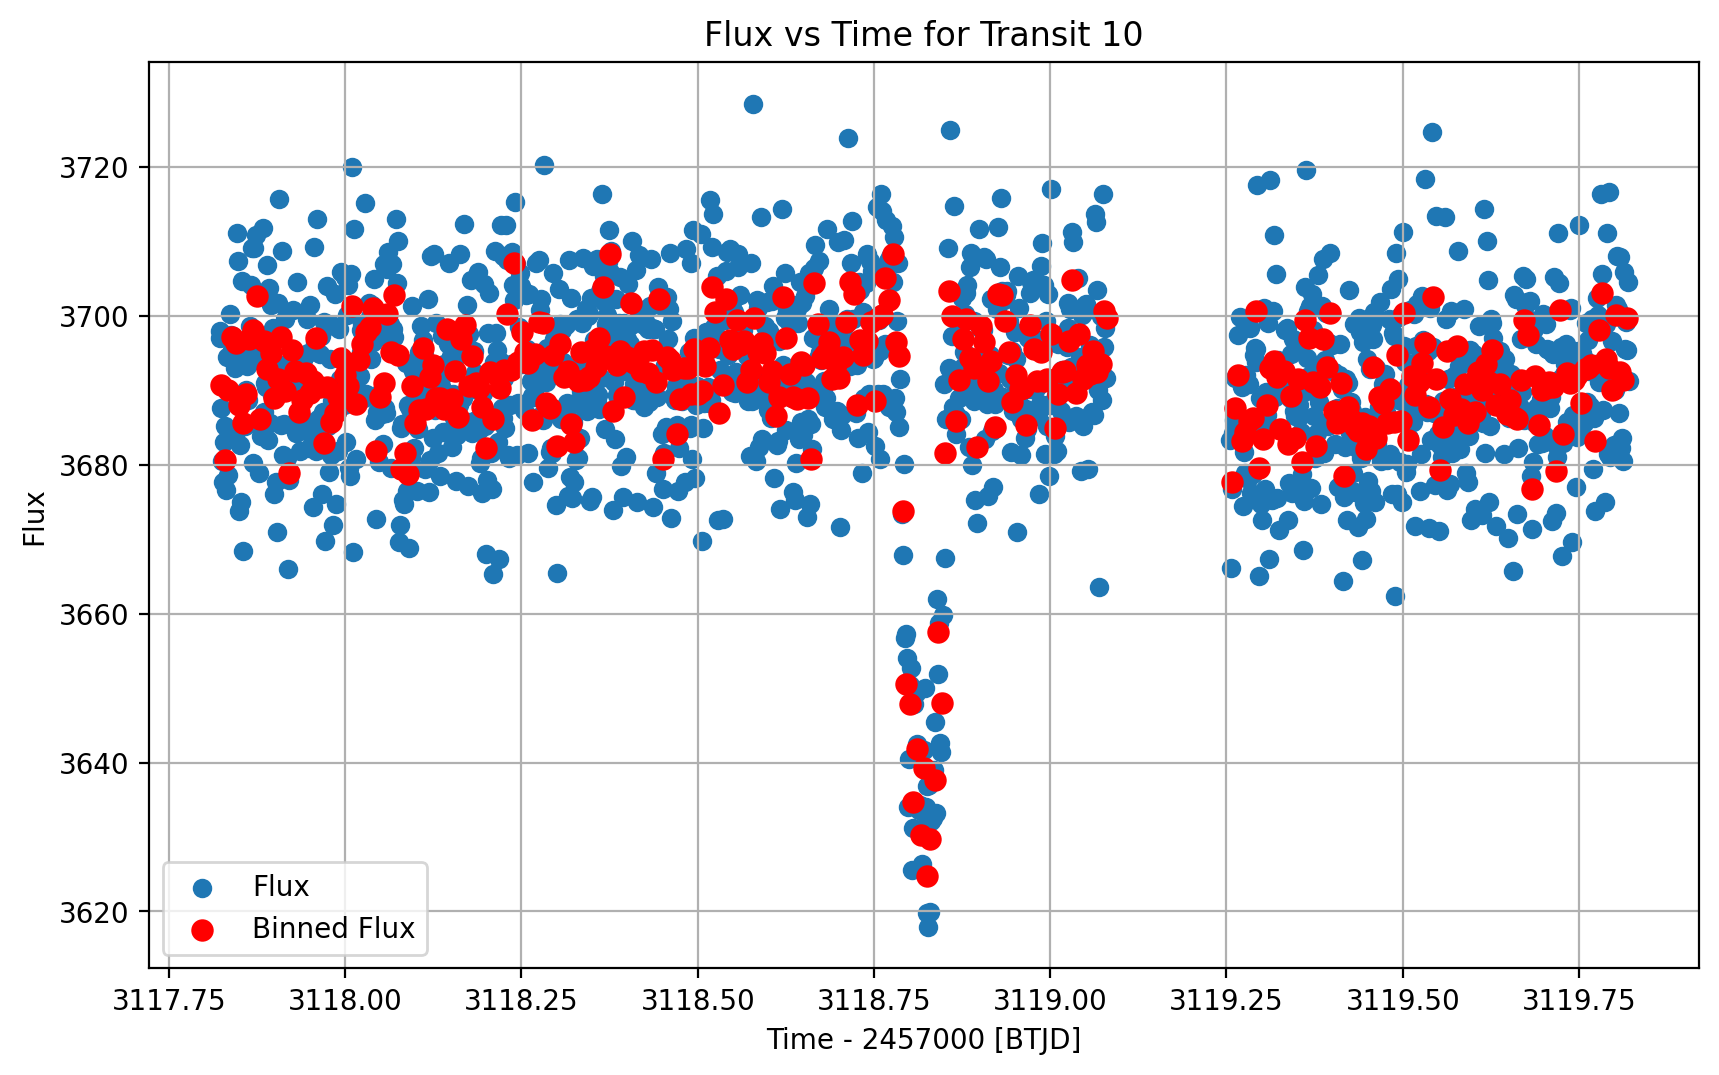

Do you wanna save this transit? (y/n): y
Transit 10 saved as Transit_Data_sector_selected_NoPF.csv_transit_10.csv.


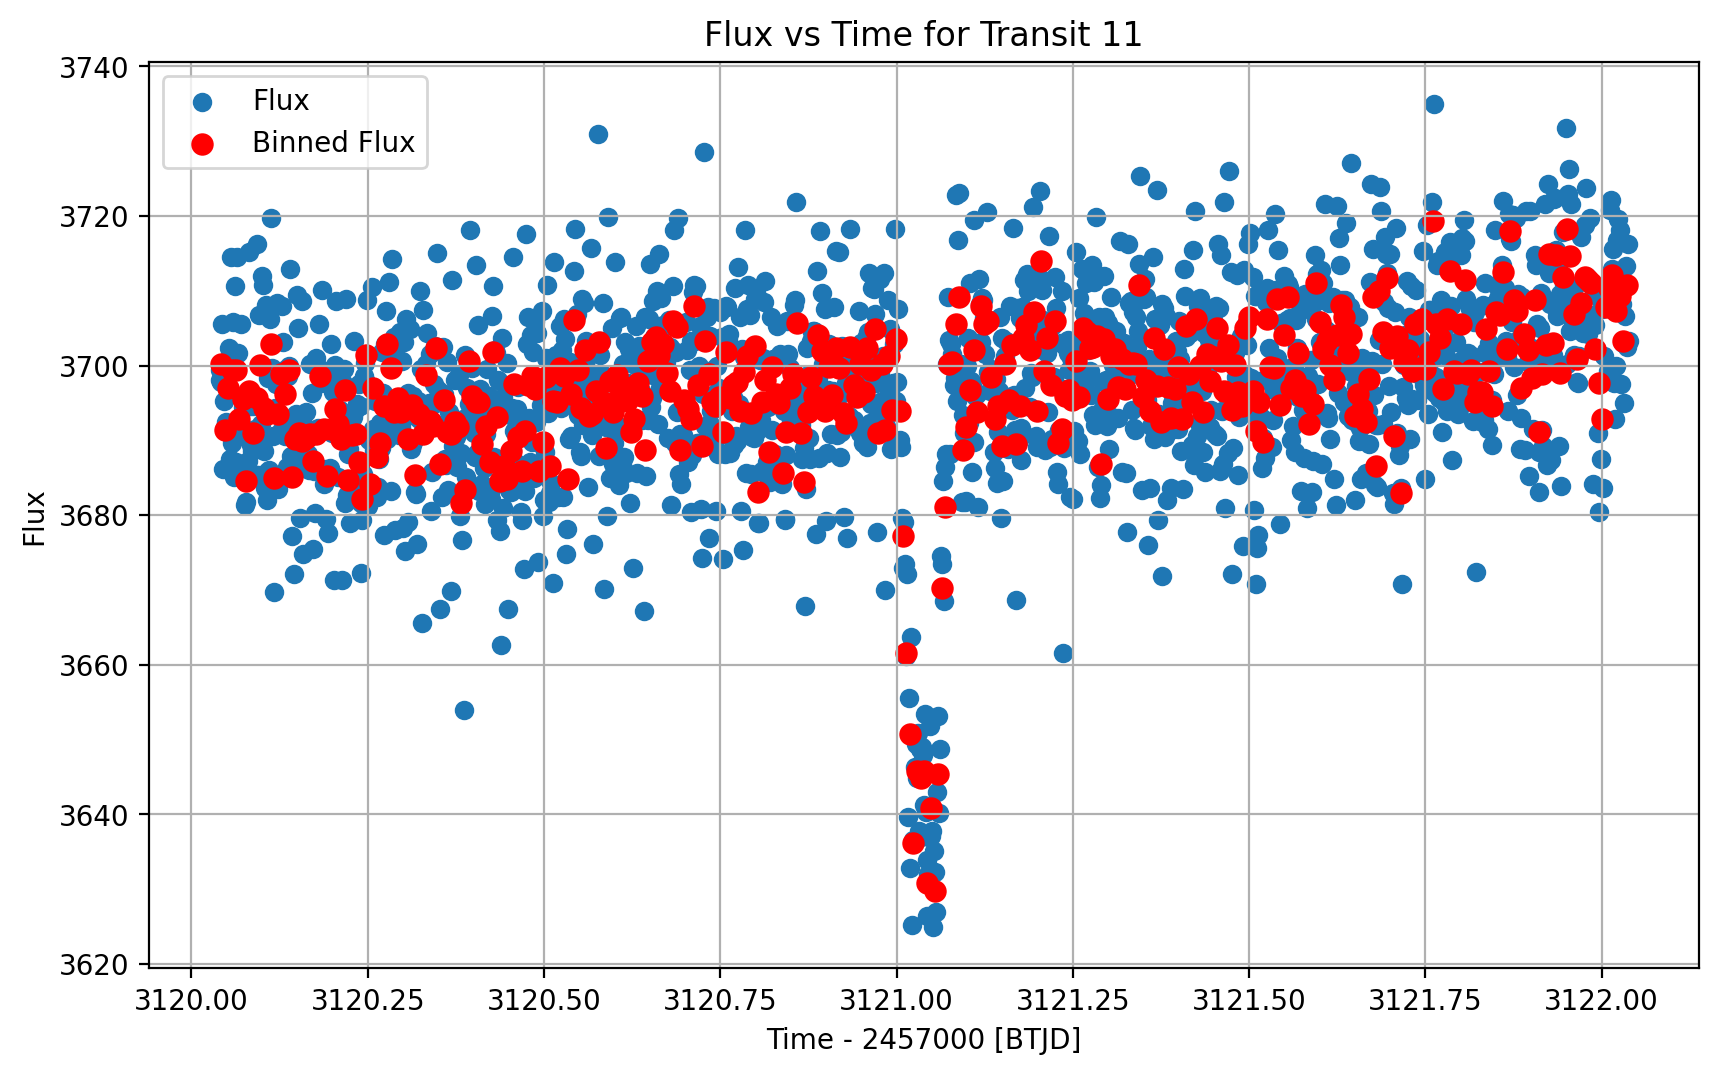

Do you wanna save this transit? (y/n): y
Transit 11 saved as Transit_Data_sector_selected_NoPF.csv_transit_11.csv.


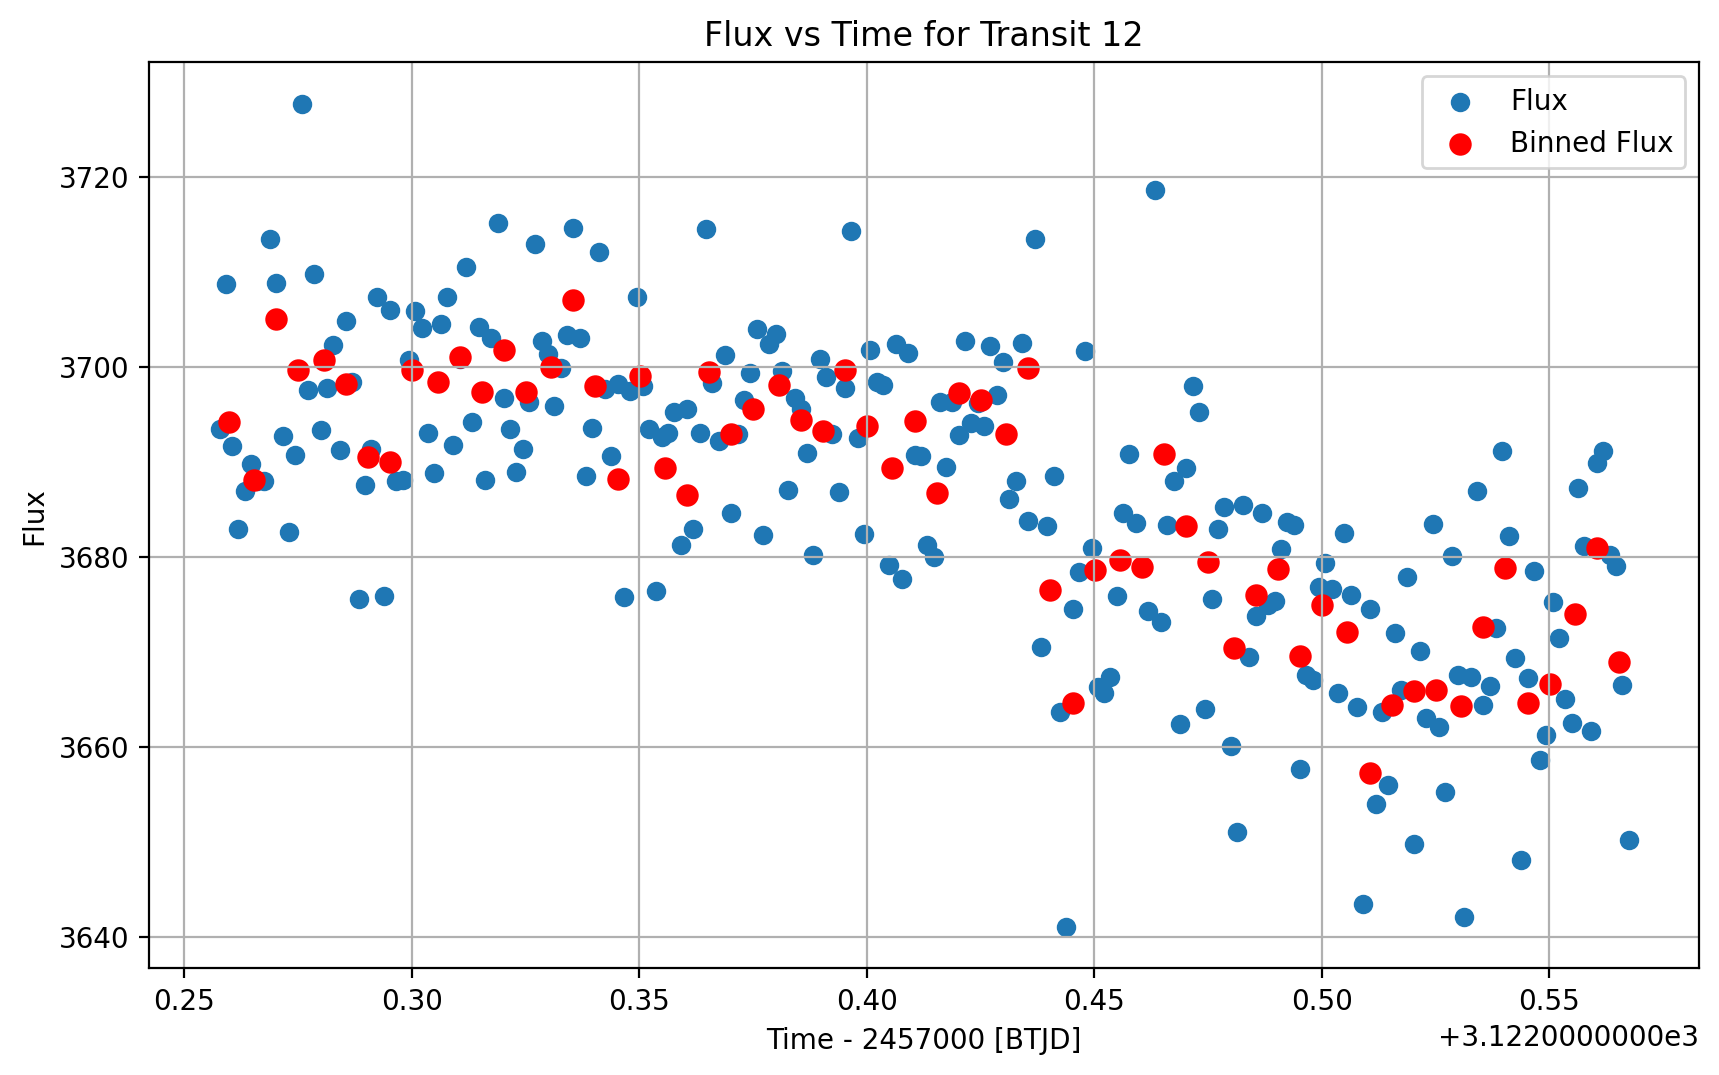

Do you wanna save this transit? (y/n): n
Plot skipped.


In [11]:
#Sepparating the possible transits. Only if needed!
#Your goal is to determinate if the transit is worth for saving

lc.select_transit(PATH, binned, name, transits)

Now that you have saved the data you needed go and apply models to them!!